# Imports and constants

In [2]:
from ultralytics import YOLO
import torch
from matplotlib import pyplot as plt
import pathlib
data_path = str(pathlib.Path('.').parent.absolute() / "../data/archive/No_Apply_Grayscale/No_Apply_Grayscale/Vehicles_Detection.v8i.yolov9/data.yaml")
print(data_path)



c:\Users\vanek\Documents\traffic_monitor_ml\notebooks\..\data\archive\No_Apply_Grayscale\No_Apply_Grayscale\Vehicles_Detection.v8i.yolov9\data.yaml


# Training


In [6]:
model = YOLO('../app/models/yolo/yolo11n.pt')

In [7]:
device = 0 if torch.cuda.is_available() else 'cpu'
print(device)

0


In [ ]:
model.train(
    data=data_path,
    epochs=100,
    imgsz=640,              # Размер входного изображения         # Количество воркеров для загрузки данных
    device=device,            
    hsv_h=0.015,            # Аугментации по цвету
    hsv_s=0.7,
    hsv_v=0.4,
    degrees=5.0,            # Вращение
    translate=0.1,          # Сдвиг
    scale=0.5,              # Масштабирование
    shear=0.1,              # Сдвиг угла
    perspective=0.0005,     # Перспективные искажения
    flipud=0.0,             # Вертикальный флип
    fliplr=0.5,             # Горизонтальный флип
    mosaic=1.0,             # Включить mosaic-аугментации
    mixup=0.1,              # Небольшой mixup
    patience=20,            # Early stopping
    save=True,              # Сохранять модель
    save_period=10,         # Сохранять чекпоинт каждые 10 эпох
    project="runs/train",   # Папка для логов
    name="traffic_yolo",    # Имя сабпапки
    exist_ok=True           # Не ругаться, если папка уже есть
)

# Showcase


image 1/1 c:\Users\vanek\Documents\traffic_monitor_ml\notebooks\..\test_images\1.png: 384x640 31 Cars, 10 Pickups, 2 Trucks, 35.7ms
Speed: 1.7ms preprocess, 35.7ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)
(270, 480, 3)


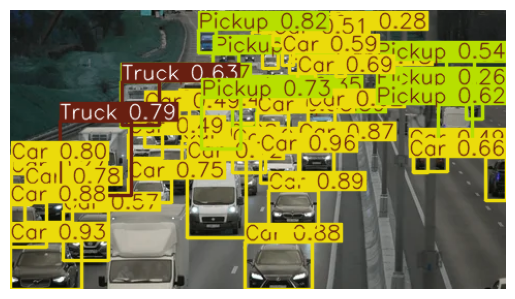


image 1/1 c:\Users\vanek\Documents\traffic_monitor_ml\notebooks\..\test_images\2.png: 384x640 4 Cars, 1 Pickup, 8.8ms
Speed: 0.7ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
(360, 640, 3)


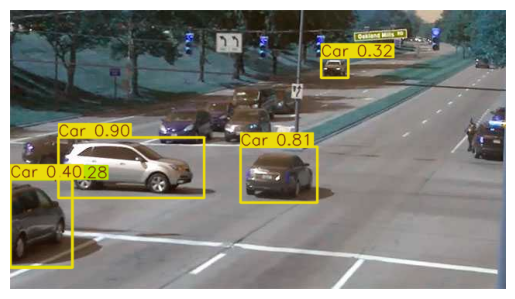


image 1/1 c:\Users\vanek\Documents\traffic_monitor_ml\notebooks\..\test_images\3.png: 384x640 11 Cars, 1 Motorcycle, 6.2ms
Speed: 1.3ms preprocess, 6.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
(606, 1100, 3)


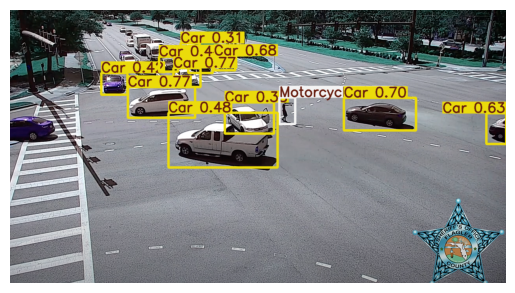


image 1/1 c:\Users\vanek\Documents\traffic_monitor_ml\notebooks\..\test_images\4.png: 384x640 1 Car, 2 Pickups, 6.2ms
Speed: 1.0ms preprocess, 6.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
(620, 1104, 3)


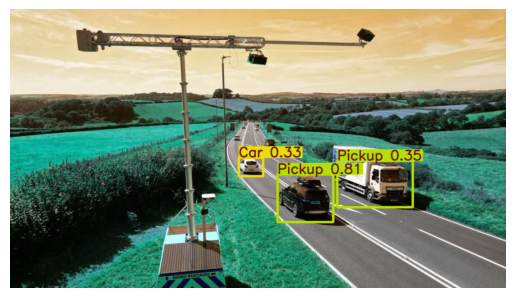


image 1/1 c:\Users\vanek\Documents\traffic_monitor_ml\notebooks\..\test_images\5.png: 448x640 8 Cars, 1 Pickup, 6.6ms
Speed: 1.0ms preprocess, 6.6ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)
(520, 790, 3)


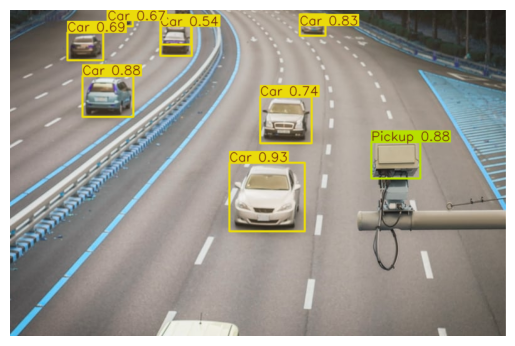

In [4]:
model = YOLO("C:/Users/vanek/Documents/traffic_monitor_ml/notebooks/runs/train/traffic_yolo/weights/best.pt")

test_images_path = pathlib.Path('../test_images')
for image_path in test_images_path.glob('*.png'):
    results = model.predict(image_path)
    img = results[0].plot()
    print(img.shape)
    plt.imshow(img)
    plt.axis("off")
    plt.show()